In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])

In [5]:
d.keys()

Index(['Time_Start', 'Time_Stop', 'Time_Mid', 'RH', 'Dp', 'RI', 'GF',
       'Org_AMS_STP', 'SO4_AMS_STP', 'NO3_AMS_STP', 'NH4_AMS_STP',
       'Chl_AMS_STP', 'mz42_AMS_STP', 'mz43_AMS_STP', 'mz44_AMS_STP',
       'mz55_AMS_STP', 'mz57_AMS_STP', 'mz58_AMS_STP', 'mz60_AMS_STP',
       'mz79_AMS_STP', 'mz91_AMS_STP', 'Sc450_total', 'Sc550_total',
       'Sc700_total', 'Sc450_submicron', 'Sc550_submicron', 'Sc700_submicron',
       'Sc550_submicron_amb', 'Abs470_total', 'Abs532_total', 'Abs660_total',
       'Ext532_submicron_dry', 'Ext532_submicron_amb', 'gamma550',
       'fRH550_RH20to80', 'AEscatDRY_450to700nm', 'AEscatAMB_450to700nm',
       'AEabsDRY_470to660nm', 'SSA_dry_450nm', 'SSA_dry_550nm',
       'SSA_dry_700nm', 'SSA_amb_550nm', 'stdPT', 'Latitude', 'Longitude',
       'GPS_Altitude', 'IR_Surf_Temp', 'Day_Of_Year', 'Pressure_Altitude',
       'Radar_Altitude', 'Ground_Speed', 'True_Air_Speed',
       'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading',
   

In [6]:
df = d[['Dp', 'RI', 'Org_AMS_STP', 'SO4_AMS_STP', 'NO3_AMS_STP', 'NH4_AMS_STP',
       'Chl_AMS_STP', 'mz42_AMS_STP', 'mz43_AMS_STP', 'mz44_AMS_STP',
       'mz55_AMS_STP', 'mz57_AMS_STP', 'mz58_AMS_STP', 'mz60_AMS_STP',
       'mz79_AMS_STP', 'mz91_AMS_STP', 'Sc450_total', 'Sc550_total',
       'Sc700_total', 'Sc450_submicron', 'Sc550_submicron', 'Sc700_submicron',
       'Sc550_submicron_amb', 'Abs470_total', 'Abs532_total', 'Abs660_total',
       'Ext532_submicron_dry', 'Ext532_submicron_amb', 'gamma550',
       'fRH550_RH20to80', 'AEscatDRY_450to700nm', 'AEscatAMB_450to700nm',
       'AEabsDRY_470to660nm', 'SSA_dry_450nm', 'SSA_dry_550nm',
       'SSA_dry_700nm', 'SSA_amb_550nm', 'stdPT', 'Latitude', 'Longitude',
       'GPS_Altitude', 'IR_Surf_Temp', 'Day_Of_Year', 'Pressure_Altitude',
       'Radar_Altitude', 'Ground_Speed', 'True_Air_Speed',
       'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading',
       'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle',
       'Static_Air_Temp', 'Potential_Temp', 'Dew/Frost_Point',
       'Total_Air_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed',
       'Wind_Direction', 'U', 'V', 'Solar_Zenith_Angle',
       'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth',
       'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O',
       'Sat_Vapor_Press_Ice', 'Relative_Humidity', 'UWindSpeed', 'VWindSpeed']]

Feature Importance:
                 Feature  Importance
41           Day_Of_Year    0.508885
0                     Dp    0.214592
55        Potential_Temp    0.033643
57        Total_Air_Temp    0.017875
29  AEscatDRY_450to700nm    0.013426
..                   ...         ...
31   AEabsDRY_470to660nm    0.001109
35         SSA_amb_550nm    0.000881
63                     V    0.000000
62                     U    0.000000
43        Radar_Altitude    0.000000

[75 rows x 2 columns]


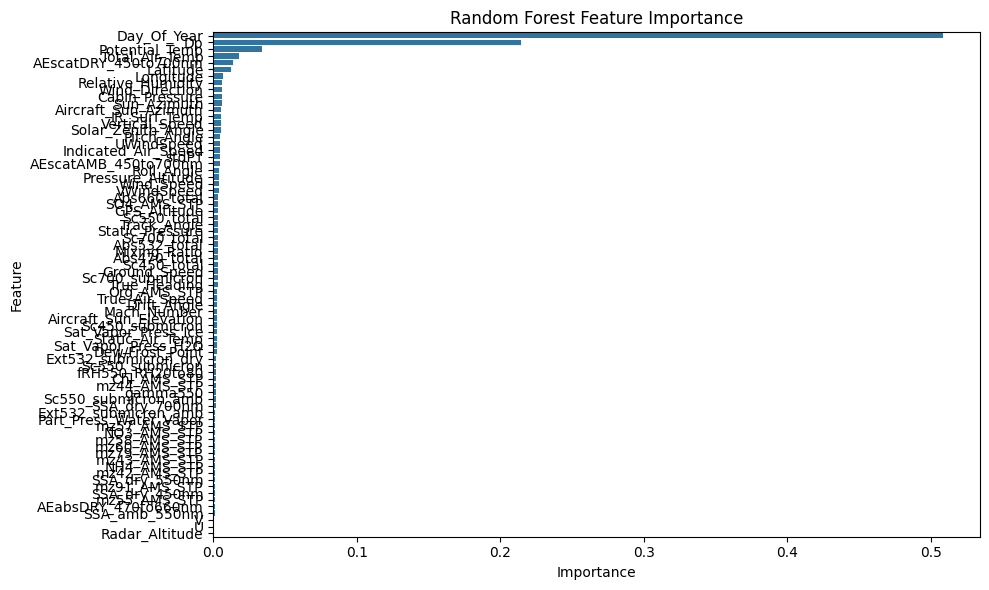

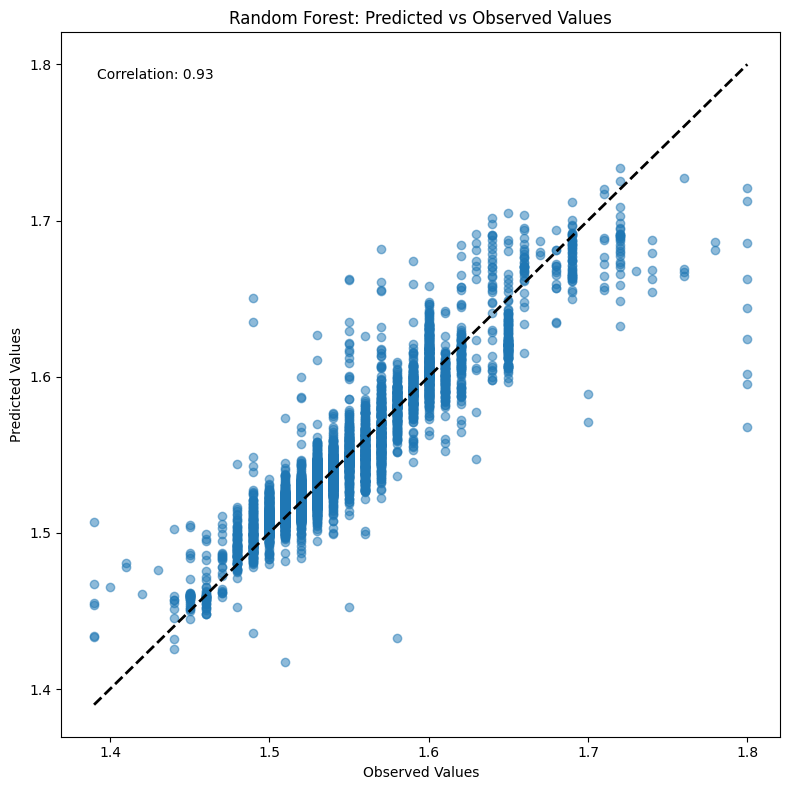

In [7]:
# 1. Prepare the data
X = df.drop('RI', axis=1)  # Features
y = df['RI']               # Target variable

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Use Classifier for classification
rf.fit(X_train, y_train)

# 4. Get predictions
y_pred = rf.predict(X_test)

# ========== Feature Importance ==========
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display the feature importance
print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# ========== Predicted vs Observed Scatter Plot ==========
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Predicted vs Observed Values')

# Add correlation coefficient
corr = np.corrcoef(y_test, y_pred)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}', 
         transform=plt.gca().transAxes, ha='left', va='top')

plt.tight_layout()
plt.show()

In [8]:
feature_importance

,Feature,Importance
41,Day_Of_Year,0.508885
0,Dp,0.214592
55,Potential_Temp,0.033643
57,Total_Air_Temp,0.017875
29,AEscatDRY_450to700nm,0.013426
...,...,...
31,AEabsDRY_470to660nm,0.001109
35,SSA_amb_550nm,0.000881
63,V,0.000000
62,U,0.000000


In [21]:
d_sub = d[d.Dp == 600]

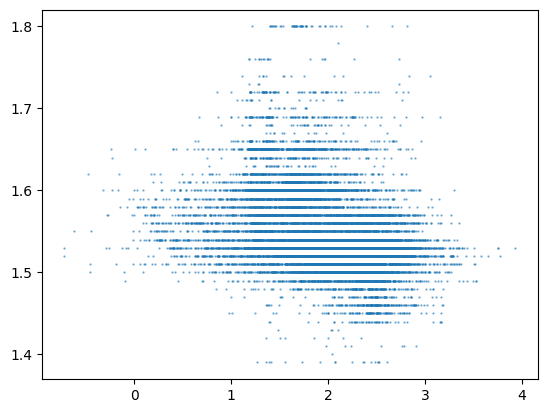

In [30]:
plt.scatter(d['AEscatDRY_450to700nm'] , d['RI'], alpha=0.5, s=.5)

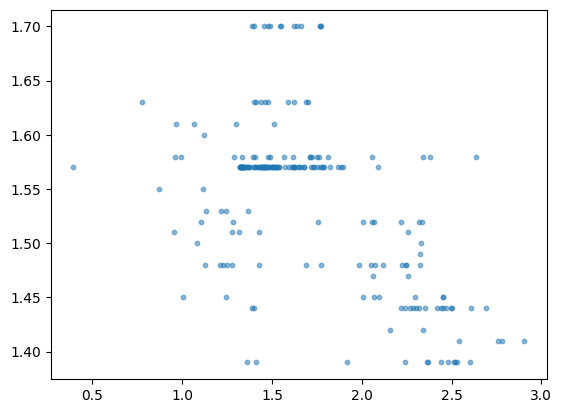

In [23]:
plt.scatter(d_sub['AEscatDRY_450to700nm'] , d_sub['RI'], alpha=0.5, s=10)

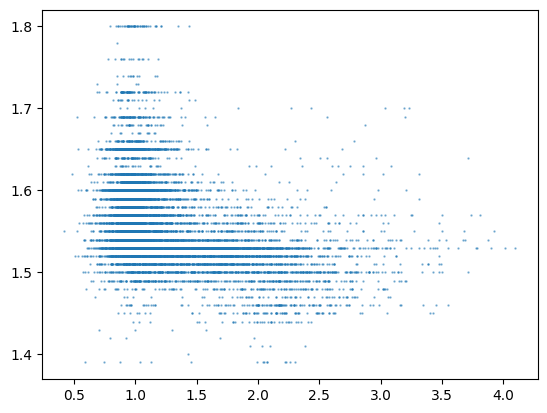

In [27]:
plt.scatter(d['fRH550_RH20to80'] , d['RI'], alpha=0.5, s=.5)